
# Project: Investigate TMDb Movie Dataset between 1960 and 2015

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project is a part of the Udacity's Data Analyst Nanodegree. In this project, I use the Python libraries Pandas, Numpy, Matplotlib and Seaborn to analyze the dataset and then communicate my findings about it. 

In this project, I perform an exploratory analysis on data provided by The Movie Database(TMDb). This data set contains information about more than 10,000 movies, including popularity, ratings, revenue, and budget between 1950 and 2015. I will explore the types of movie genres that are most popular from year to year, and examine the properties that are associated with movies with high revenues.

In [171]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import a 'magic word' so that vizualizations are plotted inline with the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

This is section of the report, I will check the data, and then identify areas to improve and clean the dataset for analysis.

### General Properties

In [172]:
# Load data and print out the first 5 few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [173]:
# Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the above printout of the first 5 lines of the dataset and the information, it is observable that each row represents a movie. There are 21 variables and 10,866 observations, showing details of the movie's popularity, ratings, information about the cast, director, production companies, and financial cost and revenue.

Based on the questions, I will drop the variables id, imdb_id, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, production_companies which are not relevant to the analysis. The budget and revenue should be dropped since the budget_adj and revenue_adj, adjusted for 2010 dollar, are more relevant for comparison overtime. Once I dropped the variables, I will inspect the datatypes again to see if I have to make any changes.

The variable 'genres' has type string, and each genre in a movie is separated by pipe (|) characters. I plan to separate the genres for each row and assign binary value for each genre.

To begin, I will check for duplicates, missing values, look at the statistical summary to notice any anomaly in the dataset.

In [174]:
# Check for duplicates
sum(df.duplicated())

1

In [175]:
# Check for null values
df.isnull().values.sum()

13434

There are quite a lot of missing values. I notice that there are a lot of missing values in the homepage variable.

In [176]:
# Get a statistical summary of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From this statistical summary, I perform a sanity check on the maximum and minimum values of the observations to see if they follow conventional belief. I need to drop the zero values for runtime because a movie cannot have zero runtime. I also need to drop the zero values for budget and revenue since revenue is an important varible in my analysis, and budget and revenue go together. Including zero values may grossly underestimate my analysis.

In [177]:
# Count the rows with zero budget
zero_budget = df.query('budget_adj == "0.0"')
len(zero_budget)

5696

In [178]:
# Count the rows with zero revenue
zero_revenue = df.query('revenue_adj == "0.0"')
len(zero_revenue) 

6016

In [179]:
# Count the rows with zero runtime
zero_runtime = df.query('runtime == 0.0')
len(zero_runtime)

31

From the count of rows with zero revenue and budget, it seems that I have to remove more than half of the observations of the dataset (6,016 movies without revenue). This is unfortunate because I initially expect that I could have kept more observations to have a robust analysis. However, I choose not to replace the zero values with a mean or a mode revenue values based on the release year because movies' successes are very different, and I would rather exclude the movies without sufficient data.

### Data Cleaning
I perform the cleaning steps in this section.

First, I drop extraneous columns that are not relevant to my questions.

In [180]:
# Keep the columns needed for analysis
keep_col = ['popularity', 'original_title', 'runtime', 'genres', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
df_trim = df[keep_col]
df_trim.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


Second, I drop duplicates and rows with missing values.

In [181]:
# Drop duplicates
df_trim = df_trim.drop_duplicates()

In [182]:
# Drop nulls
df_trim = df_trim.dropna()

In [183]:
# Drop the rows with zero runtime, budget, and revenue
df_clean = df_trim[(df_trim['runtime'] != 0.0) & (df_trim['budget_adj'] != 0.0) & (df_trim['revenue_adj'] != 0.0)]

In [184]:
df_clean.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


Since one movie has multiple genres, I want to convert the categorical variable into dummy variables, and assign 1 for each genre contained in the 'genres' column. For example, the movie Jurassic World will have value 1 for new variables 'Action,' 'Adventure,' 'Science Fiction,' 'Thriller,' and value 0 for the rest of the genres present in this dataset.

In [185]:
# Convert genres into dummy variables
df_dummy = df_clean['genres'].str.get_dummies()

In [186]:
# Join the clean dataframe with the dummy dataframe
df_main = pd.concat([df_clean, df_dummy], axis = 1)

# Statistical summary of the clean dataframe
df_main.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,...,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08,0.281526,0.194344,0.052154,...,0.033472,0.120135,0.035288,0.089258,0.173067,0.134665,0.000259,0.312403,0.030877,0.013492
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08,0.449802,0.395746,0.222366,...,0.179888,0.325161,0.184531,0.285153,0.378354,0.341410,0.016108,0.463533,0.173007,0.115386
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After cleaning, my new dataset has 3,854 observations and 27 variables. I do a sanity check with the maximum and minimum values of all the numerical variables and they look reasonable.

In [187]:
# Inspect datatypes
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 29 columns):
popularity         3854 non-null float64
original_title     3854 non-null object
runtime            3854 non-null int64
genres             3854 non-null object
vote_count         3854 non-null int64
vote_average       3854 non-null float64
release_year       3854 non-null int64
budget_adj         3854 non-null float64
revenue_adj        3854 non-null float64
Action             3854 non-null int64
Adventure          3854 non-null int64
Animation          3854 non-null int64
Comedy             3854 non-null int64
Crime              3854 non-null int64
Documentary        3854 non-null int64
Drama              3854 non-null int64
Family             3854 non-null int64
Fantasy            3854 non-null int64
Foreign            3854 non-null int64
History            3854 non-null int64
Horror             3854 non-null int64
Music              3854 non-null int64
Mystery            3854 

The data types of the clean dataframe look appropriate. Type int variables are runtime, vote_count, and all the genres. Type float variables are popularity, vote_average, budget_adj and revenue_ajd. Type object variable is genres.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from year to year?

#### Genres popularity by count
In order to get the total number of genres in the dataset, I will get a sum for each variables. Then I will drop all the variables that are not genres to create a new dataframe by year and genres.

In [188]:
# Get a sum of each column by year
df_genres = df_main.groupby('release_year').sum()

# Drop the columns that are not genres
df_genres = df_genres.drop(['popularity','runtime','vote_count','vote_average','budget_adj','revenue_adj'], axis=1)
df_genres

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,2,1,0,2,0,0,3,0,0,0,1,1,0,0,2,0,0,1,0,1
1961,2,2,1,4,1,0,6,2,0,0,1,1,1,0,1,0,0,0,1,1
1962,2,3,0,0,1,0,5,0,0,0,1,0,0,0,0,0,0,1,1,2
1963,2,2,0,1,0,0,3,0,0,0,3,1,0,1,2,0,0,3,1,0
1964,1,1,0,3,1,0,4,2,1,0,0,0,3,1,2,0,0,2,1,0
1965,2,2,0,1,0,0,3,1,0,0,1,0,1,0,2,0,0,1,1,0
1966,2,2,0,0,0,0,2,0,0,0,0,0,0,1,1,1,0,1,1,1
1967,3,5,1,5,4,0,7,2,1,0,0,0,2,1,4,0,0,3,1,0
1968,2,3,0,0,1,0,6,1,0,0,1,1,1,3,1,3,0,1,2,1


In [189]:
# Sort the count of the genres by decending order
df_genres_sum = df_genres.sum().sort_values(ascending=False)

Text(0,0.5,'Count')

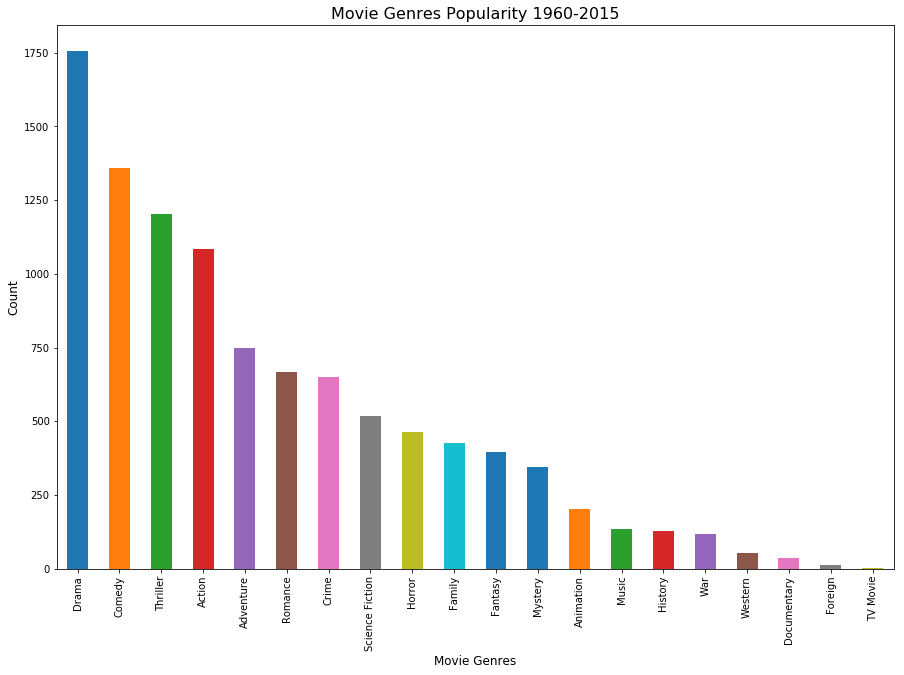

In [190]:
# Plot Move Genres Popularity 1960-2015
df_genres_sum.plot(kind='bar', figsize = (15,10));
plt.title('Movie Genres Popularity 1960-2015', fontsize=16)
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Count',fontsize=12)

**Answer**: Drama is the most popular movie genre in the period 1960-2015, out of a total of 20 genres.

The top 5 most popular movie genres are Drama, Comedy, Thriller, Action, and Adventure.

This is calculated based on the fact that a movie may have a few genres listed. If only one genre is listed, the results may change. Further analysis could be done by taking the first genre reported for each movie, putting it into another column, and then doing the similar analysis.

#### Genres popularity by proportion

I want to create another graph to show the proportion of each genre in the dataset. In order to do this, I will get the sum values for all the genres, and then convert them into a numpy array. Then I calculate the proportions by dividing the counts of the genres to the total number of genres.

In [191]:
# Calculate proportion of each genre out of the total number of genres
counts = df_genres_sum.values
totals = np.sum(counts)
proportions = counts/totals
print(proportions * 100)

[  1.70435795e+01   1.31806270e+01   1.16859167e+01   1.05309133e+01
   7.26972726e+00   6.47384257e+00   6.31854800e+00   5.03736776e+00
   4.49383675e+00   4.12501213e+00   3.84354072e+00   3.33883335e+00
   1.95088809e+00   1.32000388e+00   1.25206251e+00   1.15500340e+00
   5.04707367e-01   3.39706881e-01   1.26176842e-01   9.70591090e-03]


Text(0,0.5,'Proportion')

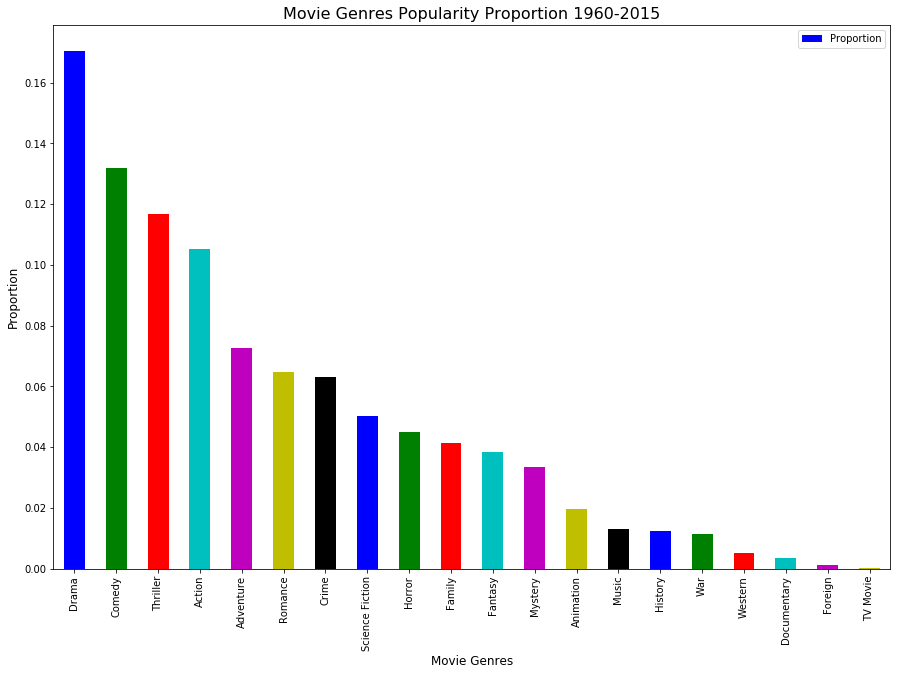

In [192]:
# Plot movie popularity by proportion
df_proportions = pd.DataFrame(proportions, columns = ['Proportion'])
colors = 'bgrcmyk'
df_proportions.plot(kind='bar', figsize = (15,10), color=colors);
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], ['Drama','Comedy','Thriller','Action','Adventure','Romance','Crime','Science Fiction','Horror', 'Family', 'Fantasy', 'Mystery', 'Animation', 'Music', 'History', 'War', 'Western', 'Documentary', 'Foreign', 'TV Movie'])
plt.title('Movie Genres Popularity Proportion 1960-2015', fontsize=16)
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Proportion',fontsize=12)

**Answer**: Drama, the most popular movie genre during 1960-2015, accounts for 17.0% (1 dp) of all the movie genres during this period.

The second most popular movie genre, Comedy, accounts for 13.1%. 

To futher supplement the bar chart of the proportion, I create a pie chart to illustrate numerical proportion.

Text(0,0.5,'Percentage')

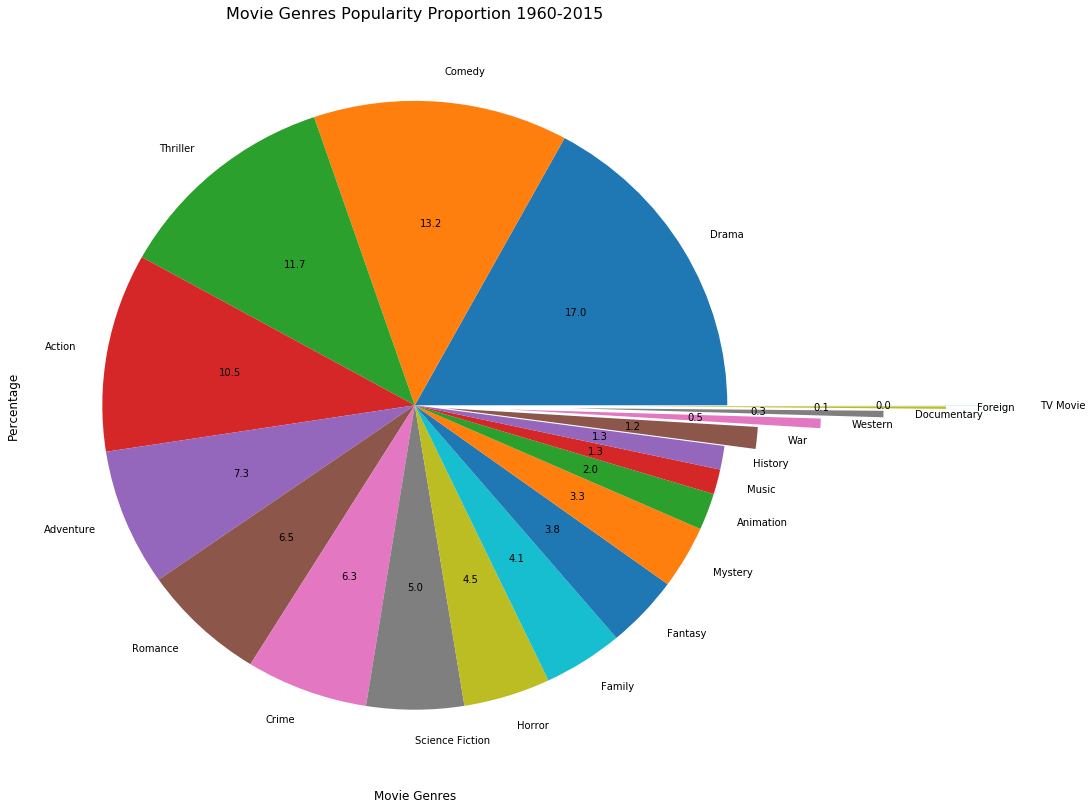

In [193]:
# Plot pie chart, show percentage
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.3, 0.5, 0.7, 0.9)
df_genres_sum.plot(kind='pie', figsize = (14,14), autopct='%.1f', fontsize=10, explode=explode);
plt.title('Movie Genres Popularity Proportion 1960-2015', fontsize=16)
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Percentage',fontsize=12)

**Answer**: From this visual, it is easy to notice that the top 4 genres (i.e., Drama, Comedy, Thriller, Action) accounts for more than half of the genres for movies between 1960 and 2015.

From the bottom, Foreign, Documentary, Western each accounts for less than 1% out of the 20 genres. TV Movies represents 0% because there is only 1 count of TV Movies in the clean dataset.

In [194]:
# Count the number of genres
df_genres_sum

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

### Research Question 2: What kind of properties are associated with movies that have high revenues?
#### Define movies that have high revenues and find their properties
I will break down the revenues of the movies into 4 groups: high, moderately high, medium, and low revenues. I will do so based on the min, 25%, 50%, 75%, and max of the revenues in this dataset.

In [195]:
# View the min, 25%, 50%, 75%, max revenue values with Pandas describe
df_main['revenue_adj'].describe()

count    3.854000e+03
mean     1.370647e+08
std      2.161114e+08
min      2.370705e+00
25%      1.835735e+07
50%      6.173068e+07
75%      1.632577e+08
max      2.827124e+09
Name: revenue_adj, dtype: float64

In [196]:
# Bin edges that put the data into groups
bin_edges = [ 2.370705e+00, 1.835735e+07, 6.173068e+07, 1.632577e+08, 2.827124e+09]

In [197]:
# Labels for the four revenue groups
bin_names = ['low', 'medium', 'moderately high', 'high'] 

According to this dataset, movies with high revenues are defined as movies that made more than 163 million. 

Movies with moderately high revenues are movies that made more than 62 million and less than 163 million.

Movies with medium revenues are movies that made more than 18 million and less than 62 million.

Movies with low revenues are movies that made less than 18 million.

In [198]:
# Creates revenue_levels column
df_main['revenue_levels'] = pd.cut(df_main['revenue_adj'], bin_edges, labels=bin_names)

I then filter the movies with high revenues and look at their statistical summary.

In [199]:
# Summary table for the movies with high revenue
df_high = df_main.query('revenue_levels == "high"')
df_high.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,Adventure,Animation,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,964.000000,964.000000,964.000000,964.000000,964.000000,9.640000e+02,9.640000e+02,964.000000,964.000000,964.000000,...,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.0,964.000000,964.000000,964.00000
mean,2.249021,117.661826,1291.208506,6.459232,1999.548755,8.699208e+07,4.026172e+08,0.415975,0.360996,0.113071,...,0.033195,0.059129,0.031120,0.081950,0.150415,0.188797,0.0,0.302905,0.044606,0.01556
std,2.337043,22.871163,1352.573788,0.710818,12.682262,5.664831e+07,2.948782e+08,0.493145,0.480539,0.316843,...,0.179238,0.235988,0.173733,0.274431,0.357663,0.391550,0.0,0.459753,0.206544,0.12383
min,0.131526,74.000000,13.000000,4.200000,1960.000000,2.248029e+02,1.632752e+08,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
25%,1.055439,100.000000,367.000000,6.000000,1993.750000,4.261977e+07,2.133481e+08,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
50%,1.638246,115.000000,803.000000,6.400000,2002.000000,7.755184e+07,3.059925e+08,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000
75%,2.642561,130.000000,1750.250000,7.000000,2010.000000,1.211748e+08,4.852349e+08,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.00000
max,32.985763,248.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.00000


**Answer**: There are 964 movies which are considered high revenue movies in this data, i.e. movies that make more than $163 million.

The average popularity of these movies is 2.25. This is very far from the maximum popularity score, so I will explore the movies with the highest popularity score below.  

The average runtime of these movies are 117.66 minutes, which are almost 2 hours.

The average voting of these movies are 6.46.

The average budget of these movies is $87 million.

The average revenue of these movies is $403 million.

In [200]:
# Find the most popular movie
df_high.sort_values('popularity', ascending=False).head(10)

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_levels
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,1,...,0,0,0,0,1,0,1,0,0,high
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,1,...,0,0,0,0,1,0,1,0,0,high
629,24.949134,Interstellar,169,Adventure|Drama|Science Fiction,6498,8.0,2014,1.519800e+08,5.726906e+08,0,...,0,0,0,0,1,0,0,0,0,high
630,14.311205,Guardians of the Galaxy,121,Action|Science Fiction|Adventure,5612,7.9,2014,1.565855e+08,7.122911e+08,1,...,0,0,0,0,1,0,0,0,0,high
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,0,...,0,0,0,0,1,0,1,0,0,high
631,12.971027,Captain America: The Winter Soldier,136,Action|Adventure|Science Fiction,3848,7.6,2014,1.565855e+08,6.583651e+08,1,...,0,0,0,0,1,0,0,0,0,high
1329,12.037933,Star Wars,121,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09,1,...,0,0,0,0,1,0,0,0,0,high
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1,...,0,0,0,0,1,0,0,0,0,high
633,10.739009,The Hunger Games: Mockingjay - Part 1,123,Science Fiction|Adventure|Thriller,3590,6.6,2014,1.151364e+08,6.927528e+08,0,...,0,0,0,0,1,0,1,0,0,high
634,10.174599,The Hobbit: The Battle of the Five Armies,144,Adventure|Fantasy,3110,7.1,2014,2.302728e+08,8.797523e+08,0,...,0,0,0,0,0,0,0,0,0,high


**Answer**: Among movies with the highest revenues, the most popular movie from 1960-2015 is Jurassic World (2015). The top 10 popular movies are mostly from 2014 and 2015, with Star Wars (1977) being the exception.

#### Properties of movies associated with high revenues compared to other movies with lower revenues
Next, I want to further look into the properties of movies with high revenues compared to those of lower revenue movies.

I want to explore the average revenue for each revenue level and create a line chart to show the rise in revenue.

In [201]:
# Use query and groupby to get the mean revenue for each revenue level
df_high = df_main.query('revenue_levels == "high"')
df_moderately_high = df_main.query('revenue_levels == "moderately high"')
df_medium = df_main.query('revenue_levels == "medium"')
df_low = df_main.query('revenue_levels == "low"')

mean_high = df_high['revenue_adj'].mean()
mean_moderately_high = df_moderately_high['revenue_adj'].mean()
mean_medium = df_medium['revenue_adj'].mean()
mean_low = df_low['revenue_adj'].mean()

Text(0,0.5,'Hundred Million Dollars')

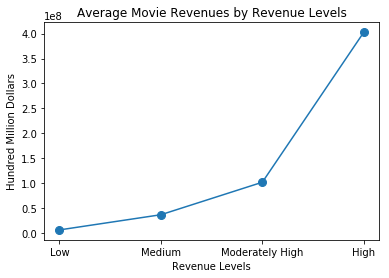

In [202]:
# Create a line plot for the data
location_revenue = [1, 2, 3, 4]
heights_revenue = [mean_low, mean_medium, mean_moderately_high, mean_high]
labels_revenue = ['Low', 'Medium', 'Moderately High', 'High']
plt.plot(location_revenue, heights_revenue, marker = 'o', markersize=8);
plt.xticks(location_revenue, labels_revenue)
plt.title('Average Movie Revenues by Revenue Levels')
plt.xlabel('Revenue Levels')
plt.ylabel('Hundred Million Dollars')

**Answer**: The average revenues of movies with high revenues are far (400 million) from the rest of the movie revenue levels (less than 100 million). The slopes of the line from low to medium, medium to moderately high, and moderately high to high become steeper and steeper. It could be inferred that the distance from one revenue level to a higher revenue level becomes further the higher the revenues are. Or in other word, one movie crew needs to collect much more revenue to jump from the moderately high status to the high status, but that movie crew needs to collect much less revenue to jump from the low to medium status.

After comparing the revenues, I want to compare other statistics of the 4 revenue levels.

In [203]:
# Compare tables for 4 levels of revenue
df_main.groupby(['revenue_levels'], as_index=False)['popularity', 'runtime', 'vote_average', 'budget_adj', 'revenue_adj'].mean()

,revenue_levels,popularity,runtime,vote_average,budget_adj,revenue_adj
0,low,0.559361,103.214730,5.958299,1.599161e+07,6.504637e+06
1,medium,0.808519,106.404984,6.066355,2.947073e+07,3.693732e+07
2,moderately high,1.148874,109.597092,6.188681,4.449050e+07,1.020595e+08
3,high,2.249021,117.661826,6.459232,8.699208e+07,4.026172e+08


**Answer**: From this summary table, high revenue movies seem to be very successful in all the other metrics.
High revenue movies receives the highest average popularity, longest average runtime, highest average vote count and vote average, and highest budget. This is consistent to other revenue levels too, suggesting that the other variables such as popularity, runtime, vote average, and budget are good predictor of revenue. They all seem to move in the same direction with revenue.

#### Genres of high revenue movies
I also want to look at the genres of high revenue movies to see if I will obtain any different result to Question 1.

In [204]:
# Explore genres by 4 levels of revenue
df_genres_levels = df_main.groupby(['revenue_levels'], as_index=False)['Drama','Comedy','Thriller','Action','Adventure','Romance','Crime','Science Fiction','Horror', 'Family', 'Fantasy', 'Mystery', 'Animation', 'Music', 'History', 'War', 'Western', 'Documentary', 'Foreign', 'TV Movie'].sum()
df_genres_levels

,revenue_levels,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Science Fiction,Horror,...,Fantasy,Mystery,Animation,Music,History,War,Western,Documentary,Foreign,TV Movie
0,low,560,321,297,197,84,185,171,105,143,...,53,89,25,36,21,20,11,23,12,0
1,medium,459,355,311,221,140,187,167,108,132,...,81,90,28,33,33,27,14,7,0,1
2,moderately high,407,357,304,266,177,150,173,124,131,...,98,86,39,37,43,29,12,5,1,0
3,high,330,325,292,401,348,145,140,182,57,...,164,79,109,30,32,43,15,0,0,0


In [205]:
# Explore genres for movies with high revenues
df_genres_high = df_genres_levels.query('revenue_levels == "high"')
df_genres_high = df_genres_high.drop('revenue_levels', axis=1)
df_genres_high

,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,Music,History,War,Western,Documentary,Foreign,TV Movie
3,330,325,292,401,348,145,140,182,57,187,164,79,109,30,32,43,15,0,0,0


I find it easier to perform a sum of a column, hence I want to transpose this table, rename the index '3' to 'High,' and then sort the values by decending order to plot a similar bar graph.

In [206]:
# Transpose data
df_genres_high = df_genres_high.transpose()

In [207]:
# Rename the column name to 'High' and sort by decesding order
df_genres_high.columns = ['High']
df_genres_high = df_genres_high.sort_values(by=['High'], ascending=False)

Text(0,0.5,'Count')

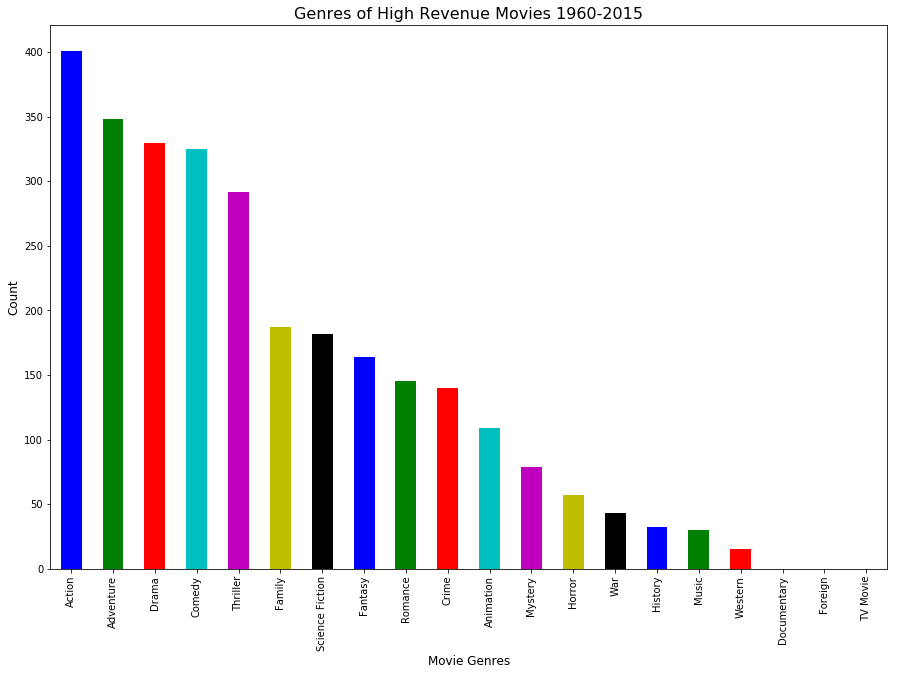

In [208]:
# Plot genres of high revenue movies
colors = 'bgrcmyk'
df_genres_high.plot(kind='bar', figsize = (15,10), color=colors, legend=False);
plt.title('Genres of High Revenue Movies 1960-2015', fontsize=16)
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Count',fontsize=12)

**Answer**: The top 5 genres of movies that have high revenues are Action, Adventure, Drama, Comedy, and Thriller. These are also the top 5 genres of all the movies in the dataset. However, the orders are different compared to the figure in the research question 1. In question 1, the order is [Drama, Comedy, Thriller, Action, Adventure] for the top 5, and here the order is [Action, Adventure, Drama, Comedy, Thriller].

#### What movies have high revenues?
I want to take a look at top 10 highest earning movies between 1960 and 2015.

In [209]:
# Find movies with the highest revenues
df_main.sort_values('revenue_adj', ascending=False).head(10)

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_levels
1386,9.432768,Avatar,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09,1,...,0,0,0,0,1,0,0,0,0,high
1329,12.037933,Star Wars,121,Adventure|Action|Science Fiction,4428,7.9,1977,3.957559e+07,2.789712e+09,1,...,0,0,0,0,1,0,0,0,0,high
5231,4.355219,Titanic,194,Drama|Romance|Thriller,4654,7.3,1997,2.716921e+08,2.506406e+09,0,...,0,0,0,1,0,0,1,0,0,high
10594,2.010733,The Exorcist,122,Drama|Horror|Thriller,1113,7.2,1973,3.928928e+07,2.167325e+09,0,...,1,0,0,0,0,0,1,0,0,high
9806,2.563191,Jaws,124,Horror|Thriller|Adventure,1415,7.3,1975,2.836275e+07,1.907006e+09,0,...,1,0,0,0,0,0,1,0,0,high
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,1,...,0,0,0,0,1,0,0,0,0,high
8889,2.900556,E.T. the Extra-Terrestrial,115,Science Fiction|Adventure|Family|Fantasy,1830,7.2,1982,2.372625e+07,1.791694e+09,0,...,0,0,0,0,1,0,0,0,0,high
8094,1.136610,The Net,114,Crime|Drama|Mystery|Thriller|Action,201,5.6,1995,3.148127e+07,1.583050e+09,1,...,0,0,1,0,0,0,1,0,0,high
10110,2.631987,One Hundred and One Dalmatians,79,Adventure|Animation|Comedy|Family,913,6.6,1961,2.917944e+07,1.574815e+09,0,...,0,0,0,0,0,0,0,0,0,high
4361,7.637767,The Avengers,143,Science Fiction|Action|Adventure,8903,7.3,2012,2.089437e+08,1.443191e+09,1,...,0,0,0,0,1,0,0,0,0,high


**Answer**: The movie with the highest revenue up to 2015 is Avatar (2009). Star War has 2 movies in this list: Star War (1977) and Star Wars: The Force Awakens (2015). This list shows that every decade (i.e. 60s, 70s, 80s, 90s, 00s, 10s) has at least one movie in the top 10 highest earning movies between 1960 and 2015.

#### What are revenues pattern over time?

There are two things I'm interested in: the highest revenue, and the average revenue for each year. I want to see if movies nowadays generally earn more than movies in the past.

In [210]:
# Calculate the maximum revenues and average revenues for each year
year_max_rev = df_main.groupby(['release_year'], as_index=False)['revenue_adj'].max()
year_ave_rev = df_main.groupby(['release_year'], as_index=False)['revenue_adj'].mean()

Text(0,0.5,'Billion Dollars')

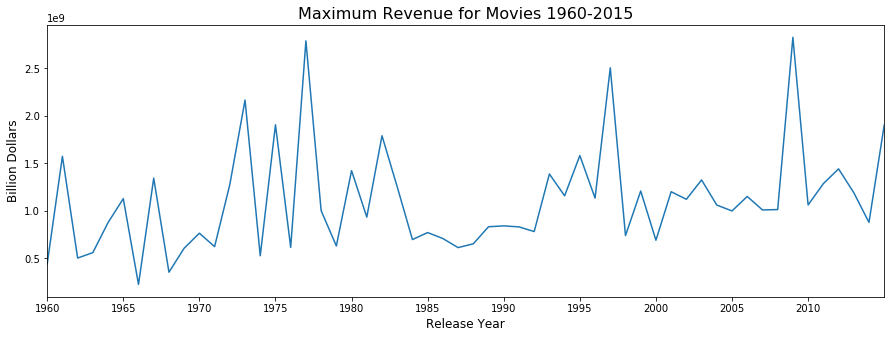

In [211]:
# Plot the maximum revenue for movies over time
year_max_rev.plot(kind='line', x='release_year', figsize=(15,5), fontsize=10, legend=False);
plt.title('Maximum Revenue for Movies 1960-2015', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.xlim([1960, 2015])
plt.xticks(np.arange(1960, 2015, 5))
plt.ylabel('Billion Dollars', fontsize=12)

**Answer**: From this graph, it seems like each time period has its own movie that could produce high earning. There are spikes of movies with high revenues over the period 1960-2015. The highest spikes happened in 1977, 1997, and 2009. They are Star Wars (1977), Titanic (1997), and Avatar (2009). The period 1985-1992 does not observe any movies with very high revenues.

Text(0,0.5,'Hundred Million Dollars')

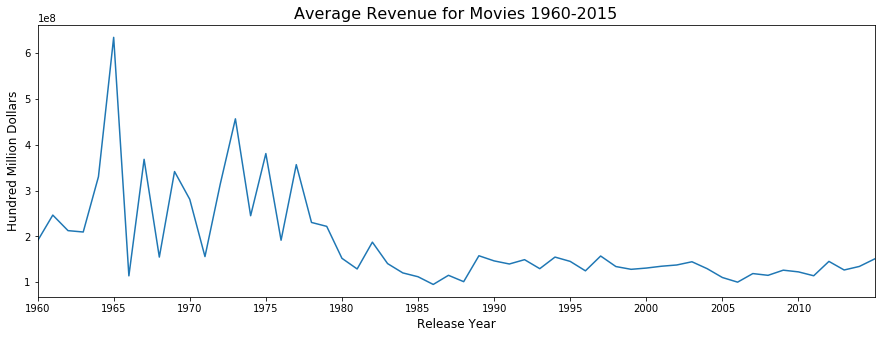

In [212]:
# Plot the average revenue for movies over time
year_ave_rev.plot(kind='line', x='release_year', figsize=(15,5), fontsize=10, legend=False)
plt.title('Average Revenue for Movies 1960-2015', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.xlim([1960, 2015])
plt.xticks(np.arange(1960, 2015, 5))
plt.ylabel('Hundred Million Dollars', fontsize=12)

**Answer**: It is surprising that the average revenue for movies over time is right-skewed. The higher revenue movies are in the period 1965-1977, and generally the average revenues for movies from 1989-2015 are below $200 million. This could be explained that in the past, there were fewer movies, people had few options so the revenues were concentrated in a few titles. However, there are a lot of movies released each year nowadays, hence the revenues are shared among viewers and it brings down the average revenue of all the movies for the whole year.

The average revene for movies in 1965 is $634 million. The highest earning movie in 1965 is The Sound of Music, which earned 1.23 billion in 2010 dollars.

In [213]:
# Find the average movie revenues in 1965
df_main.query('release_year == 1965')['revenue_adj'].mean()

634036929.51198053

In [214]:
df_main.query('release_year == 1965').sort_values('revenue_adj', ascending=False)

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,Action,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,revenue_levels
10690,1.313676,The Sound of Music,174,Drama|Family|Music|Romance,620,7.2,1965,5.674862e+07,1.129535e+09,0,...,0,1,0,1,0,0,0,0,0,high
10689,1.910465,Thunderball,130,Adventure|Action|Thriller,331,6.3,1965,7.612620e+07,9.771535e+08,1,...,0,0,0,0,0,0,1,0,0,high
10691,1.282053,Doctor Zhivago,197,Drama|Romance|War,126,6.9,1965,9.688789e+07,7.731786e+08,0,...,0,0,0,1,0,0,0,1,0,high
10692,0.622157,Those Magnificent Men in Their Flying Machines...,138,Action|Adventure|Comedy,19,6.6,1965,3.875516e+07,2.072709e+08,1,...,0,0,0,0,0,0,0,0,0,high
10716,0.146033,The Greatest Story Ever Told,199,Drama|History,13,5.7,1965,1.384113e+08,8.304676e+07,0,...,0,0,0,0,0,0,0,0,0,moderately high


<a id='conclusions'></a>
## Conclusions

### Limitations

- There are a lot of unreported runtime, budget and revenue for this dataset, resulting in only about 35% of the observations in the dataset being used for the analysis (3,854 out of 10,866). If I had more observations in my analysis, the results could be different.
- 'Genres' column contains multiple values separated by pipe characters. Hence, the assumption for this analysis is that a movie may have more than one genre. If only movie only has one genre, the result could be different.  
- My classification of four movie revenue levels is only based on the descriptive statistic and not based on any official/formal classification. Any change in the definition of the revenue levels could change my results and vizualizations.
- There are fewer movies produced in the 20th century than movies produced in the 21st century. This could make the descritive statistics of movies in the past less robust than movies closer to the present. I have not provided a way to normalize some variables in this dataset for better comparison.

### Results
From the data set, the top 5 most popular movie genres between 1960 and 2015 are Drama, Comedy, Thriller, Action, and Adventure. The top 5 most popular genres account for more than 50 percent of the genres. The limitation of this result is that a movie may contain a few genres, hence the result may change if one movie is allowed to be classified by one genre. For next step, I could cut all the letters in the string after the first pipe (|) character, read only the first genre in the string, create a new binary variable just for that first genre, and then do a similar analysis.

Movies that have high revenues often associate with high average popularity, runtime, ratings, and budget. All of the variables seem to move in the same direction with the level of revenue. However, since I do not perform a linear regression with revenue as the dependent variable, the analysis in this project does not imply causation. In addition, it is surprising that the average revenues for movies back in the 60s and 70s were higher than those for movies in the 2000s in terms of 2010 dollars, accounting for inflation over time. Further exploration for movies in different decade could be a topic of interest.  

In [215]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295

## Sources
- tmdb-movies.csv: https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1514965061319000&usg=AFQjCNFwrmLj2hO02fU5ASDcGdpg2_VctA
- Read more on the TMDB Movie Dataset from Kaggle: https://www.kaggle.com/tmdb/tmdb-movie-metadata

## References
- Useful pandas functions: http://queirozf.com/entries/pandas-dataframe-by-example#drop-a-column
- Convert categorial variable into dummy variables: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
- Seaborn box plot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- Convert from dataframe to numpy array: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html#pandas.DataFrame.values